In [2]:
# Colab에서 필요한 패키지 설치
!pip install gymnasium imageio matplotlib

In [3]:
import gymnasium as gym
import numpy as np
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 1) 환경 생성
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
n_states  = env.observation_space.n
n_actions = env.action_space.n

In [4]:
# 2) Q-table 초기화
Q = np.random.random((n_states, n_actions))

In [5]:
# 3) 하이퍼파라미터
alpha    = 0.8        # 학습률
gamma    = 0.95       # 할인율
epsilon  = 1.0        # ε-greedy 탐사 비율
epsilon_decay = 0.995 # ε-decay
min_epsilon = 0.01    # ε 최솟값
n_episodes = 2000     # 학습 에피소드 수
max_steps   = 100     # 에피소드 당 최대 스텝

In [6]:
# 4) 학습 루프
rewards_per_episode = []

for ep in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0

    for t in range(max_steps):
        # ε-greedy 행동 선택
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q 업데이트: Q(s,a) ← Q(s,a) + α [r + γ max_b Q(s',b) – Q(s,a)]
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state
        total_reward += reward
        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

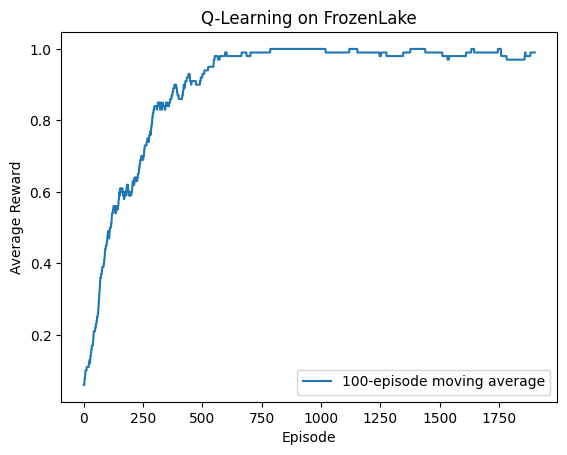

In [7]:
# 5) 학습 결과 플롯
plt.plot(
    np.convolve(rewards_per_episode, np.ones(100)/100, mode='valid'),
    label='100-episode moving average'
)
plt.title("Q-Learning on FrozenLake")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

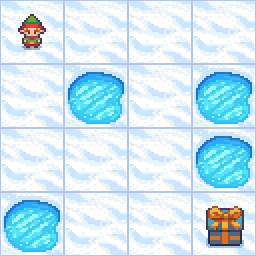

In [ ]:
# 6) 학습된 Q로 테스트 & GIF 저장
frames = []
state, _ = env.reset()
terminated = False
truncated = False
for _ in range(50):
    frames.append(env.render())                # 화면 프레임 캡처
    action = np.argmax(Q[state])               # 학습된 정책 사용

    if terminated or truncated:
        break
    state, reward, terminated, truncated, _ = env.step(action)

env.close()

# GIF로 저장

gif_path = "frozenlake_qlearning.gif"
imageio.mimsave(gif_path, frames, fps=5)

# Colab에 GIF 출력
display(Image(filename=gif_path))